## https://www.tensorflow.org/guide/keras/rnn
## https://www.learnpythonwithrune.org/get-started-with-recurrent-neural-network-rnn-with-tensorflow/?amp=1https://www.learnpythonwithrune.org/get-started-with-recurrent-neural-network-rnn-with-tensorflow/?amp=1

### => find supported versions, type in conda prompt : conda-tree whoneeds -t numpy 

### => use this in Conda Env: py36_np1164_tf1140
#### Versions: Python = 3.6, numpy = 1.16.4, tensorflow = 1.14.0


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt


# RNN

In [2]:
model = keras.Sequential()
model.add(layers.Embedding(input_dim=1000, output_dim=64))

# The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 256)
model.add(layers.GRU(256, return_sequences=True))

# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
model.add(layers.SimpleRNN(128))

model.add(layers.Dense(10))

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          64000     
_________________________________________________________________
gru (GRU)                    (None, None, 256)         246528    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               49280     
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
Total params: 361,098
Trainable params: 361,098
Non-trainable params: 0
_________________________________________________________________


# LSTM

In [370]:

file_url = 'https://raw.githubusercontent.com/LearnPythonWithRune/MachineLearningWithPython/main/files/aapl.csv'
data = pd.read_csv(file_url, parse_dates=True, index_col=0)

# Create a train and test set
data_train = data.loc['2000':'2016', 'Adj Close'].to_numpy()
data_test = data.loc['2017':'2021', 'Adj Close'].to_numpy()

# Use the MinMaxScaler to scale the data
scaler = MinMaxScaler()
data_train = scaler.fit_transform(data_train.reshape(-1, 1))
data_test = scaler.transform(data_test.reshape(-1, 1))

# To divide data into x and y set
def data_preparation(data, data_bunch):
    x = []
    y = []
    
    for i in range(data_bunch, len(data)):
        x.append(data[i-data_bunch:i, 0])
        y.append(data[i])
        
    x = np.array(x)
    y = np.array(y)
    
    x = x.reshape(x.shape[0], x.shape[1], 1)
    
    return x, y


forcaststep = 20

x_train, y_train = data_preparation(data_train, forcaststep)
x_test, y_test = data_preparation(data_test, forcaststep)

data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1.004464,0.907924,0.936384,0.999442,535796800.0,0.858137
2000-01-04,0.987723,0.903460,0.966518,0.915179,512377600.0,0.785788
2000-01-05,0.987165,0.919643,0.926339,0.928571,778321600.0,0.797286
2000-01-06,0.955357,0.848214,0.947545,0.848214,767972800.0,0.728291
2000-01-07,0.901786,0.852679,0.861607,0.888393,460734400.0,0.762789
...,...,...,...,...,...,...
2021-08-09,146.699997,145.520004,146.199997,146.089996,48908700.0,146.089996
2021-08-10,147.710007,145.300003,146.440002,145.600006,68922200.0,145.600006
2021-08-11,146.720001,145.529999,146.050003,145.860001,48422100.0,145.860001


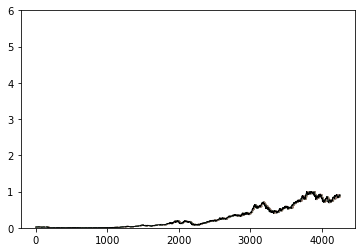

In [373]:
for i in range(0, forcaststep, 1):
    plt.plot(x_train[:,i,0], ls='--', lw=1, alpha=0.5)
plt.plot(y_train, lw=1, color='k')
plt.ylim(0,6)
plt.show()

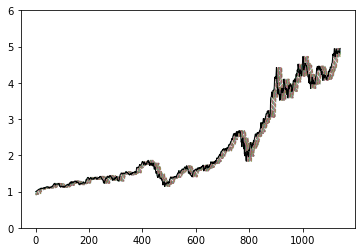

In [374]:
for i in range(0, forcaststep, 1):
    plt.plot(x_test[:,i,0], ls='--', lw=1, alpha=0.5)
plt.plot(y_test, lw=1, color='k')
plt.ylim(0,6)
plt.show()

In [375]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(4257, 20, 1) (4257, 1) (1142, 20, 1) (1142, 1)


### define LSTM model

In [376]:
# Create the model
model = Sequential()
model.add(LSTM(units=45, return_sequences=True, input_shape=(x_train.shape[1],1)))
# model.add(LSTM(units=45, return_sequences=True))
model.add(LSTM(units=45))
model.add(Dense(units=1))

model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_57 (LSTM)               (None, 20, 45)            8460      
_________________________________________________________________
lstm_58 (LSTM)               (None, 45)                16380     
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 46        
Total params: 24,886
Trainable params: 24,886
Non-trainable params: 0
_________________________________________________________________


In [436]:
###Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

### Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32)

### train-fit
y_trainfit = model.predict(x_train)
y_trainfit_unscaled = scaler.inverse_transform(y_trainfit)

### Predict with the model
y_pred = model.predict(x_test)
### Unscale it
y_unscaled = scaler.inverse_transform(y_pred)

Epoch 1/5
4257/4257 [==============================] - 6s 1ms/sample - loss: 1.2371e-04 - acc: 4.6981e-04
Epoch 2/5
4257/4257 [==============================] - 5s 1ms/sample - loss: 1.2584e-04 - acc: 4.6981e-04 0s - loss: 1.2611e-04 - acc: 2.500
Epoch 3/5
4257/4257 [==============================] - 5s 1ms/sample - loss: 9.9914e-05 - acc: 4.6981e-04
Epoch 4/5
4257/4257 [==============================] - 5s 1ms/sample - loss: 9.6515e-05 - acc: 4.6981e-04
Epoch 5/5
4257/4257 [==============================] - 5s 1ms/sample - loss: 8.0470e-05 - acc: 4.6981e-04


In [437]:
y_pred.shape

(1142, 1)

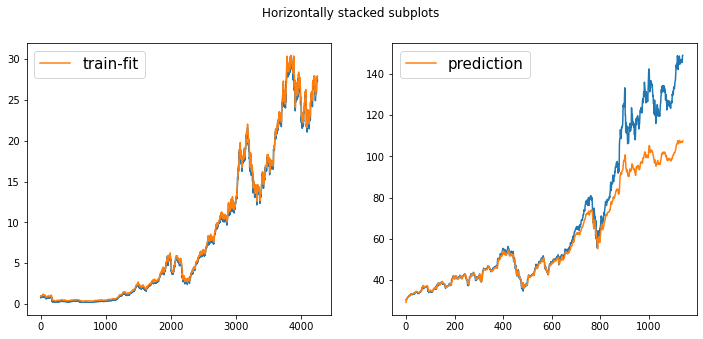

In [439]:
# See the prediction accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('Horizontally stacked subplots')

y_train_real = data.loc['2000':'2016', 'Adj Close'].to_numpy()
ax1.plot(y_train_real[forcaststep:])
ax1.plot(y_trainfit_unscaled, label='train-fit')
ax1.legend(prop={'size': 15})

y_test_real = data.loc['2017':'2021', 'Adj Close'].to_numpy()
ax2.plot(y_test_real[forcaststep:])
ax2.plot(y_unscaled, label='prediction')
ax2.legend(prop={'size': 15})

plt.show()

## Autonomous prediction

In [440]:
last_vals=20
x_init = x_train[-last_vals:, :,:]
x_init.shape

(20, 20, 1)

In [441]:

### Predict with the model
y_pred = model.predict(x_init)
### Unscale it
y_unscaled = scaler.inverse_transform(y_pred)

y_pred.shape

(20, 1)

In [442]:
def Autonomous_prediction(model, x_init, pred_till):
    y_all_predict=[]

    for i in range(pred_till):
        y_pred = model.predict(x_init)
        y_all_predict.append(y_pred[:])#(y_pred[-1])

        x_init = np.append(x_init[1:], y_pred[-1])

        x_init = np.reshape(x_init, (x_init.shape[0],1,1))
    
    return np.asarray(y_all_predict)


In [443]:
pred_till=1

y_all_predict = Autonomous_prediction(model, x_init, pred_till)


In [444]:
y_all_predict[0,:,0]

array([0.8690984 , 0.8657891 , 0.8622083 , 0.86324114, 0.8691164 ,
       0.87790066, 0.8903463 , 0.8961391 , 0.9041971 , 0.90907955,
       0.912912  , 0.9150014 , 0.91780895, 0.920375  , 0.92198837,
       0.91984624, 0.9183863 , 0.9202619 , 0.9204683 , 0.9201568 ],
      dtype=float32)

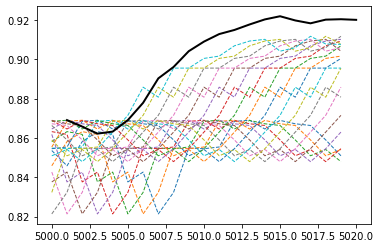

In [445]:
t= np.arange(5000, 5000+last_vals, 1) 
for i in range(0, forcaststep, 1):
    plt.plot(t, x_init[:,i,0], ls='--', lw=1, alpha=1)

tn = np.arange(5000+last_vals, 5000+last_vals+pred_till, 1)
plt.plot(t+1, y_all_predict[0,:,0], ls='-', lw=2, c='k', alpha=1)

# plt.xlim(1000, 5400)
# plt.ylim(0,100)
plt.show()